# Proyecto Automotora Anaconda

### Integrantes
        - Paulo Gonzalez
        - Esteban Sanchez
        - Gonzalo Rojas
        - Daniel Mardones
        - Jorge Guerrero
### Profesor
        - Daniel Beffermann
### Ayudante
        - Jhon Poma


In [1]:
# instalación de librerias y/o modulos

## Scipy
### Bajo pip -- python -m pip install scipy
### Bajo Conda -- conda install scipy

## sqlalchemy
### Bajo pip -- pip install SQLAlchemy
###             pip install sqlalchemy-utils

### Bajo Conda conda install -c anaconda sqlalchemy
###            conda install -c conda-forge sqlalchemy-utils
## Informacion del sistema
###             pip install sinfo


In [2]:
# Importaciones

# Tratamiento de datos
# ==================================================================================================================
import pandas as pd
import numpy as np
from pandas import ExcelWriter
import missingno as msngo
from sqlalchemy import create_engine

# Gráficos
# ==================================================================================================================
from matplotlib import pyplot as plt
import seaborn as sns

# Preprocesado y modelado
# ==================================================================================================================
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LogisticRegression, LinearRegression, LassoCV, ElasticNet
from sklearn.ensemble import GradientBoostingRegressor, AdaBoostRegressor, RandomForestRegressor, BaggingRegressor
from sklearn.metrics import mean_squared_error, median_absolute_error, r2_score
from sklearn.preprocessing import StandardScaler
from lazypredict.Supervised import LazyRegressor
import pickle

# Varios
# ==================================================================================================================
import scipy.stats as stats
import funciones as fx
from sinfo import sinfo


# Configuración seaborn
# ==================================================================================================================
sns.set(rc = {'figure.figsize':(20,12)})

# Configuración warnings
# ==================================================================================================================
import warnings
warnings.filterwarnings('ignore')

In [3]:
sinfo()

The `sinfo` package has changed name and is now called `session_info` to become more discoverable and self-explanatory. The `sinfo` PyPI package will be kept around to avoid breaking old installs and you can downgrade to 0.3.2 if you want to use it without seeing this message. For the latest features and bug fixes, please install `session_info` instead. The usage and defaults also changed slightly, so please review the latest README at https://gitlab.com/joelostblom/session_info.
-----
funciones   NA
lazypredict 0.2.12
matplotlib  3.5.3
missingno   0.5.1
numpy       1.21.5
pandas      1.4.4
pygam       0.8.0
scipy       1.7.3
seaborn     0.12.1
sinfo       0.3.4
sklearn     1.1.3
sqlalchemy  1.4.32
-----
IPython             7.31.1
jupyter_client      7.4.7
jupyter_core        4.11.2
jupyterlab          3.5.0
notebook            6.5.2
-----
Python 3.9.12 (main, Apr  5 2022, 01:53:17) [Clang 12.0.0 ]
macOS-10.16-x86_64-i386-64bit
8 logical CPU cores, i386
-----
Session information update

In [4]:
help(fx.boxplot_graph)
help(fx.conexion_sqlalchemy)

Help on function boxplot_graph in module funciones:

boxplot_graph(X, Y, Title)
    definición: funcion que realiza muestra de graficos boxplot para visualizar los OUTLIERS del dateframe
     
    X: dataframe sin vetor objetivo
    Y: vector objetivo 
    Title: titulo de grafico
     
    retorno: retorna print de graficos boxplot

Help on function conexion_sqlalchemy in module funciones:

conexion_sqlalchemy()
    definición: conexion con bd postgres
         
    retorno: retorna conexion a bd



In [5]:
help(fx.create_database)

Help on function create_database in module sqlalchemy_utils.functions.database:

create_database(url, encoding='utf8', template=None)
    Issue the appropriate CREATE DATABASE statement.
    
    :param url: A SQLAlchemy engine URL.
    :param encoding: The encoding to create the database as.
    :param template:
        The name of the template from which to create the new database. At the
        moment only supported by PostgreSQL driver.
    
    To create a database, you can pass a simple URL that would have
    been passed to ``create_engine``. ::
    
        create_database('postgresql://postgres@localhost/name')
    
    You may also pass the url from an existing engine. ::
    
        create_database(engine.url)
    
    Has full support for mysql, postgres, and sqlite. In theory,
    other database engines should be supported.



In [6]:

help(fx.graph)
help(fx.boxplot_graph)

Help on function graph in module funciones:

graph(dataframe)
    definición: funcion que realiza graficos de un dataset enviado como paramtero
         
    dataframe: set de datos a graficar
    
    retorno: retorna print de series del dataframe

Help on function boxplot_graph in module funciones:

boxplot_graph(X, Y, Title)
    definición: funcion que realiza muestra de graficos boxplot para visualizar los OUTLIERS del dateframe
     
    X: dataframe sin vetor objetivo
    Y: vector objetivo 
    Title: titulo de grafico
     
    retorno: retorna print de graficos boxplot



In [7]:
help(fx.selectViewComplete)
help(fx.selectViewTest)

Help on function selectViewComplete in module funciones:

selectViewComplete(conn)
    definición: funcion que realiza consulta select a vista desde postgres
     
    conn: conexion base de datos postgres
     
    retorno: retorna la consulta select de los datos completos

Help on function selectViewTest in module funciones:

selectViewTest(conn)
    definición: funcion que realiza consulta select a vista desde postgres
     
    conn: conexion base de datos postgres
     
    retorno: retorna la consulta select de los datos de test convertidos en dataframe



In [8]:
help(fx.selectViewTrain)
help(fx.report_metrics)

Help on function selectViewTrain in module funciones:

selectViewTrain(conn)
    definición: funcion que realiza consulta select a vista desde postgres
    
    conn: conexion base de datos postgres
    
    retorno: retorna la consulta select de los datos de train convertidos en dataframe

Help on function report_metrics in module funciones:

report_metrics(model, dataframeTrain, dataframeTest, vector_objetivo, titulo, key, list_model_result, df_Predict)
    definición: funcion que realiza print de metricas segun modelo envaido como parametro
     
    model: Modelo regresion 
    dataframeTrain: muestra de train
    dataframeTest: muestra de test
    vector_objetivo: columna a evaluar como vector objetivo
    titulo: titulo de print
    list_model_result: diccionario que guardara lista de modelos
    
    retorno: retorna print de metricas




## Definición del problema

### Se debe realizar un estudio de mercado de de compra-venta de automóviles. Para ello, contamos con tres set de datos (train, test y lista completa) de distintos automóviles y sus precios de venta. Lo que se quiere determinar, es si dadas las condiciones de venta de un automóvil a la automotora le conviene o no comprarlo.

# Datos

### Los tres set datos continen la misma cantidad de columnas (8 columnas), pero distinta cantidad de filas.
        - true_car_listings.csv = 852.122 filas.
        - true_cars_train.csv = 639.145 filas.
        - true_cars_test.csv = 212.977 filas.
        
### Las columnas de los tres dataset originales son las siguientes:

`PriceCar:` Precio de venta del vehículo (USD).

`Year:` Año del vehículo.

`MileageCar:` Kilometraje del vehículo (millas).

`City:` Ciudad en la que se realizó la transacción.

`State:` Estado en el que se realizó la transacción.

`Vin:` Número VIN (único para cada vehículo).

`MakeCar:` Empresa manufacturera del vehículo.

`ModelCar:` Modelo del vehículo.

### Ademas se incorporar nuevas columnas mediante uso de Web scraping, utilizando el VIN del vehiculo. Estas columnas son:

`Doors:` Número de puertas                       

`Fuel_Type: ` Tipo de combustible              

`Engine_Displacement_CC:` Cilindrada del vehiculo

`Engine_Displacement_CI:` HP de fuerza del vehiculo

`Engine_Number_Cylinders:` Número de cilindros

`Transmission_Speeds:` Número de velocidades

### Los dataset originales seran alojados en una base de datos PostgresSQL, adicionando las nuevas columnas para cada uno de los set de datos. Para trabajar con los datos se realiza una conexión mediante SQLAlchemy, desde la cual se generan los dos set de datos a utilizar: 
        - df_train = fx.selectViewTrain(conn) 
        - df_test = fx.selectViewTest(conn))

### En este proceso se realiza la codificación de las variables categoricas, como la normalización de los datos y la revisión de datos nulos. 

### El diagrama de la base de datos se muestra a continuación:

![Diagrama_BD](imagenes_notebook/esquema_bbdd.jpeg)

### El objetivo es obtener un modelo capaz de predecir el precio del valor de cada automovil.

# Análisis exploratorio

In [9]:
# Conexión a BD PostgreSQL
conn = fx.conexion_sqlalchemy()

#### Preparación del ambiente de trabajo desde Bd postgres

In [10]:
# Creación de dataset de entrenamiento, testeo y EDA mediante función, la cual se conecta a BD PostgreSQL
df_train = fx.selectViewTrain(conn)
df_test = fx.selectViewTest(conn)
#df_complete = fx.selectViewComplete(conn)

#### Visualizacion general dataframe

In [11]:
df_train.head()

,Id,Vin,Year,Price,Mileage,City,City_Id,State,State_Id,Make,...,Model_Id,Doors,Fuel_Type,Fuel_Id,Engine_Displacement_CC,Engine_Displacement_CI,Engine_Number_Cylinders,Transmission_Speeds,Gama,Gama_Id
0,1,19VDE1F52DE012636,2013,10888,19606,Long Island City,8923,NY,41,Acura,...,1226,4,gasoline,6,1997.00,121.90,4,5,generalista,1
1,2,19VDE1F71EE003817,2014,10999,39922,Windsor,10156,CO,8,Acura,...,1226,4,gasoline,6,1997.00,121.90,4,5,generalista,1
2,3,19UDE2F32GA001284,2016,14799,22142,Lindon,8893,UT,52,Acura,...,1229,4,gasoline,6,2359.74,144.00,4,8,generalista,1
3,4,JH4CU2F83CC019895,2012,7989,105246,Miami,9057,FL,13,Acura,...,2394,4,gasoline,6,2359.74,144.00,4,5,generalista,1
4,5,JH4CU2F64DC006203,2013,13995,32384,West Jordan,10092,UT,52,Acura,...,2393,4,gasoline,6,2359.74,144.00,4,5,generalista,1


In [12]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 618256 entries, 0 to 618255
Data columns (total 22 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   Id                       618256 non-null  int64  
 1   Vin                      618256 non-null  object 
 2   Year                     618256 non-null  int64  
 3   Price                    618256 non-null  int64  
 4   Mileage                  618256 non-null  int64  
 5   City                     618256 non-null  object 
 6   City_Id                  618256 non-null  int64  
 7   State                    618256 non-null  object 
 8   State_Id                 618256 non-null  int64  
 9   Make                     618256 non-null  object 
 10  Make_Id                  618256 non-null  int64  
 11  Model                    618256 non-null  object 
 12  Model_Id                 618256 non-null  int64  
 13  Doors                    618256 non-null  int64  
 14  Fuel

In [13]:
df_test.head()

,Id,Vin,Year,Price,Mileage,City,City_Id,State,State_Id,Make,...,Model_Id,Doors,Fuel_Type,Fuel_Id,Engine_Displacement_CC,Engine_Displacement_CI,Engine_Number_Cylinders,Transmission_Speeds,Gama,Gama_Id
0,1,19VDE2E53EE000083,2014,8995,35725,El Paso,8307,TX,51,Acura,...,1227,4,gasoline,6,2354.00,144.00,4,6,generalista,1
1,2,19VDE2E52DE000025,2013,8995,48851,El Paso,8307,TX,51,Acura,...,1227,4,gasoline,6,2354.00,144.00,4,6,generalista,1
2,3,JH4CU2F84EC002686,2014,14490,34032,Greatneck,8550,NY,41,Acura,...,2397,4,gasoline,6,2359.74,144.00,4,5,generalista,1
3,4,JH4CU2F44CC003220,2012,12921,58550,Boise,7867,ID,19,Acura,...,2394,4,gasoline,6,2359.74,144.00,4,5,generalista,1
4,5,19VDE1F31EE009243,2014,14995,23454,Hackettstown,8583,NJ,38,Acura,...,1226,4,gasoline,6,1997.00,121.90,4,5,generalista,1


In [14]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 206042 entries, 0 to 206041
Data columns (total 22 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   Id                       206042 non-null  int64  
 1   Vin                      206042 non-null  object 
 2   Year                     206042 non-null  int64  
 3   Price                    206042 non-null  int64  
 4   Mileage                  206042 non-null  int64  
 5   City                     206042 non-null  object 
 6   City_Id                  206042 non-null  int64  
 7   State                    206042 non-null  object 
 8   State_Id                 206042 non-null  int64  
 9   Make                     206042 non-null  object 
 10  Make_Id                  206042 non-null  int64  
 11  Model                    206042 non-null  object 
 12  Model_Id                 206042 non-null  int64  
 13  Doors                    206042 non-null  int64  
 14  Fuel

Durante el proceso de analisis exploratorio, pudismos observar que se presenta una gran cantidad de outliers que complejizan la predicción de los modelos propuestos, como se puede observar en el grafico boxplot adjunto. 

![boxplot](imagenes_notebook/output.png)

Para ello buscamos distintas estrategias de resolución a este problema. Probamos con la eliminacion de outliers mediante `Tukey` la cual se basa el clásico boxplot, que usa cuartiles y los desvíos de los puntos respecto de 1,5 veces el cuartil 25 y 75. Esta tecnica nos eliminaba el 50% de los registros, ante lo cual la descartamos.

Finalmente utilizamos la división del set datos de entrenamiento y testeo, por el criterio de rangos de precios. Bajo esta estrategia dividimos los conjuntos en 9 set de datos. Cabe destacar, que bajo esta estrategia se omite a eliminación de outliers, quedando la totalidad de los datos para las futuras pruebas.

#### Division de dataframe segun rango de precios

In [15]:
#dividir dataset segun gama('generalista, premium, super-premium')

df_test_generalista = df_test[df_test.Gama == 'generalista']
df_test_generalista = df_test_generalista.select_dtypes(include='number')

df_test_premium1 = df_test[df_test.Gama == 'premium_1']
df_test_premium1 = df_test_premium1.select_dtypes(include='number')

df_test_premium2 = df_test[df_test.Gama == 'premium_2']
df_test_premium2 = df_test_premium2.select_dtypes(include='number')

df_test_premium3 = df_test[df_test.Gama == 'premium_3']
df_test_premium3 = df_test_premium3.select_dtypes(include='number')

df_test_premium4 = df_test[df_test.Gama == 'premium_4']
df_test_premium4 = df_test_premium4.select_dtypes(include='number')

df_test_premium5 = df_test[df_test.Gama == 'premium_5']
df_test_premium5 = df_test_premium5.select_dtypes(include='number')

df_test_premium6 = df_test[df_test.Gama == 'premium_6']
df_test_premium6 = df_test_premium6.select_dtypes(include='number')

df_test_premium7 = df_test[df_test.Gama == 'premium_7']
df_test_premium7 = df_test_premium7.select_dtypes(include='number')

df_test_premium8 = df_test[df_test.Gama == 'premium_8']
df_test_premium8 = df_test_premium8.select_dtypes(include='number')


In [16]:
#dividir dataset segun gama('generalista, premium, super-premium')

df_train_generalista = df_train[df_train.Gama == 'generalista']
df_train_generalista = df_train_generalista.select_dtypes(include='number')

df_train_premium1 = df_train[df_train.Gama == 'premium_1']
df_train_premium1 = df_train_premium1.select_dtypes(include='number')

df_train_premium2 = df_train[df_train.Gama == 'premium_2']
df_train_premium2 = df_train_premium2.select_dtypes(include='number')

df_train_premium3 = df_train[df_train.Gama == 'premium_3']
df_train_premium3 = df_train_premium3.select_dtypes(include='number')

df_train_premium4 = df_train[df_train.Gama == 'premium_4']
df_train_premium4 = df_train_premium4.select_dtypes(include='number')

df_train_premium5 = df_train[df_train.Gama == 'premium_5']
df_train_premium5 = df_train_premium5.select_dtypes(include='number')

df_train_premium6 = df_train[df_train.Gama == 'premium_6']
df_train_premium6 = df_train_premium6.select_dtypes(include='number')

df_train_premium7 = df_train[df_train.Gama == 'premium_7']
df_train_premium7 = df_train_premium7.select_dtypes(include='number')

df_train_premium8 = df_train[df_train.Gama == 'premium_8']
df_train_premium8 = df_train_premium8.select_dtypes(include='number')

#### Analisis Exploratorio

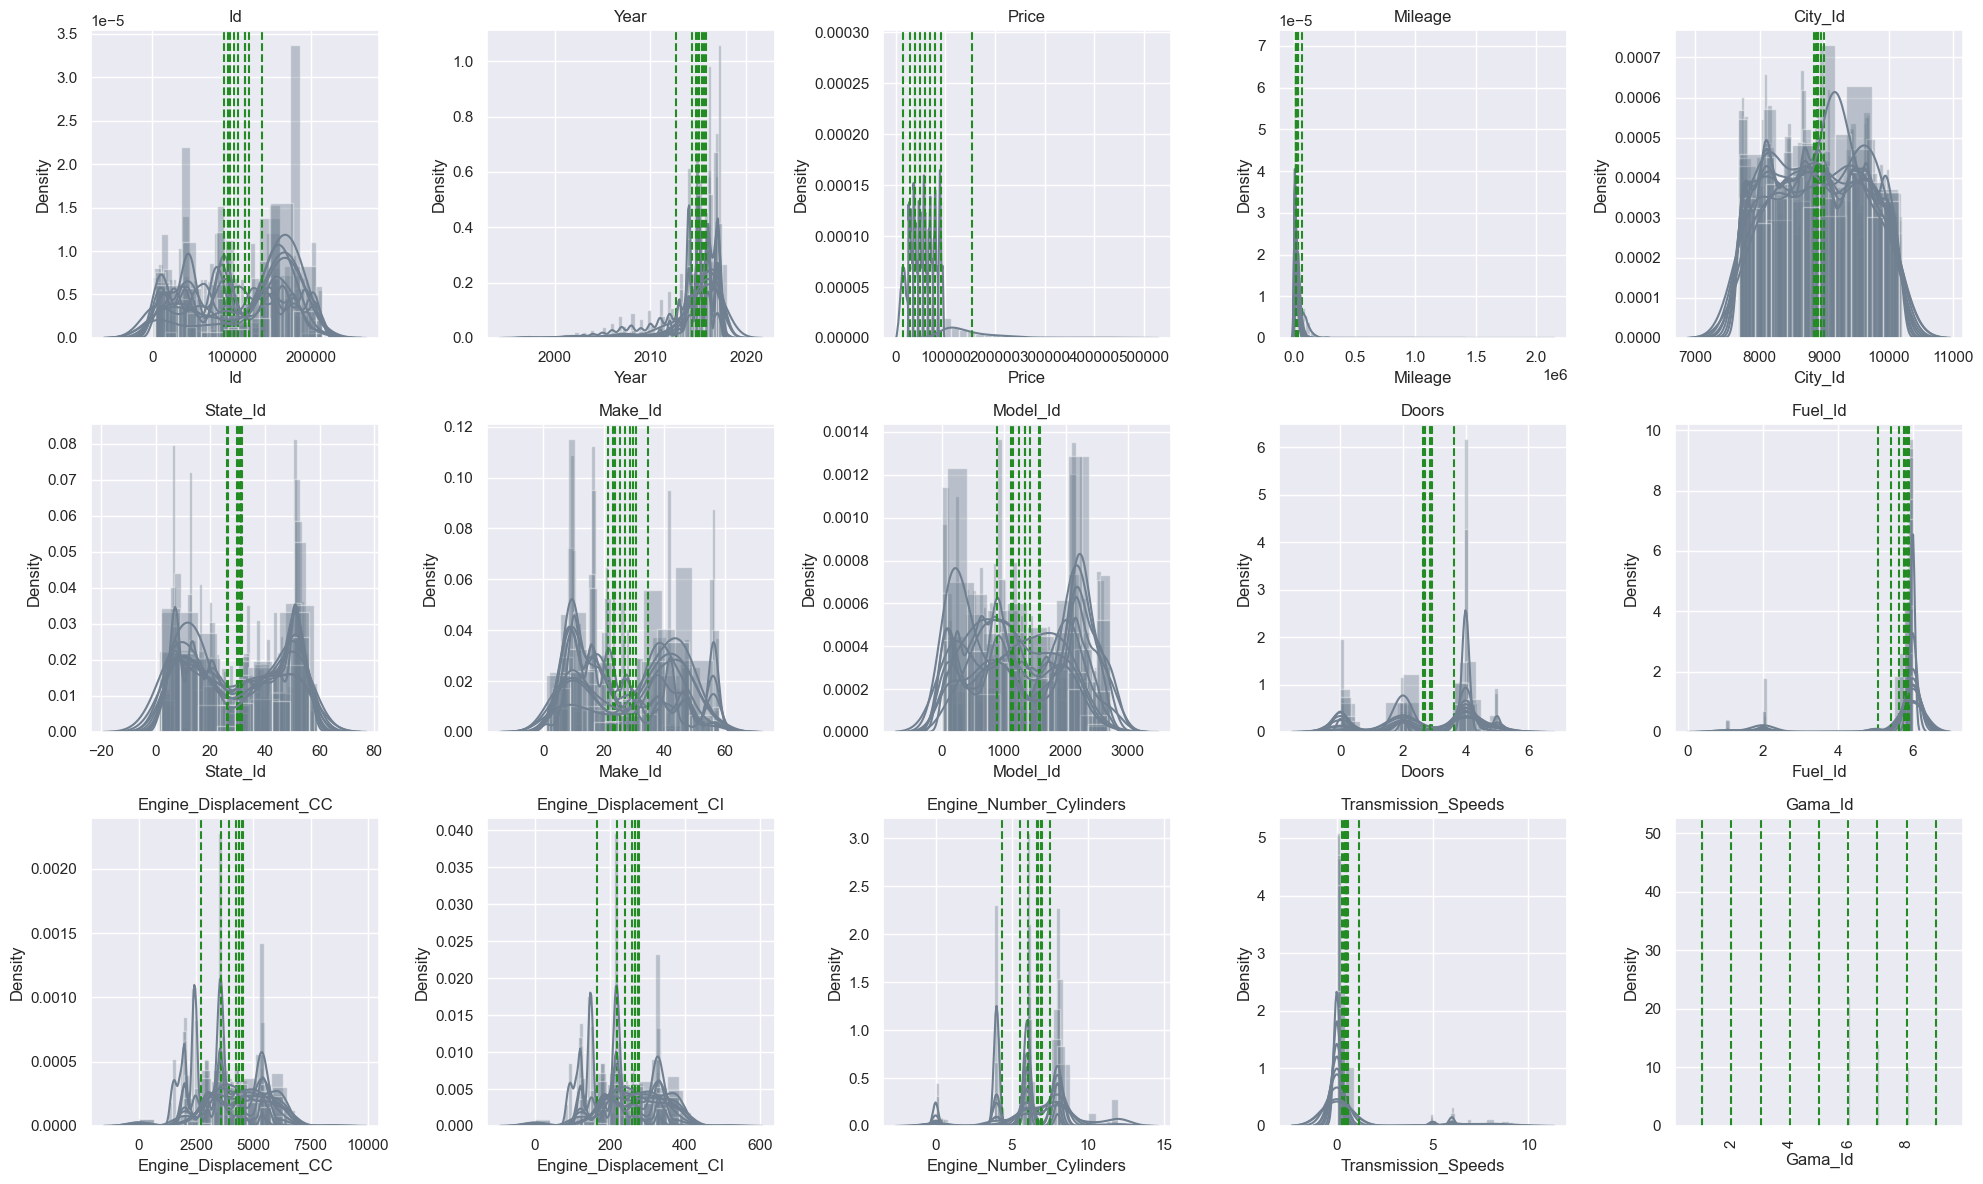

In [17]:
list_make = []
list_make = [df_test_generalista, df_test_premium1, df_test_premium2, df_test_premium3, df_test_premium4, df_test_premium5, df_test_premium6
             , df_test_premium7, df_test_premium8]

for index, value in enumerate(list_make):
    df_test_obj = value
    #df_test_obj = value[["Price"]]    
    fx.graph(df_test_obj)

<AxesSubplot:xlabel='Price', ylabel='Make'>

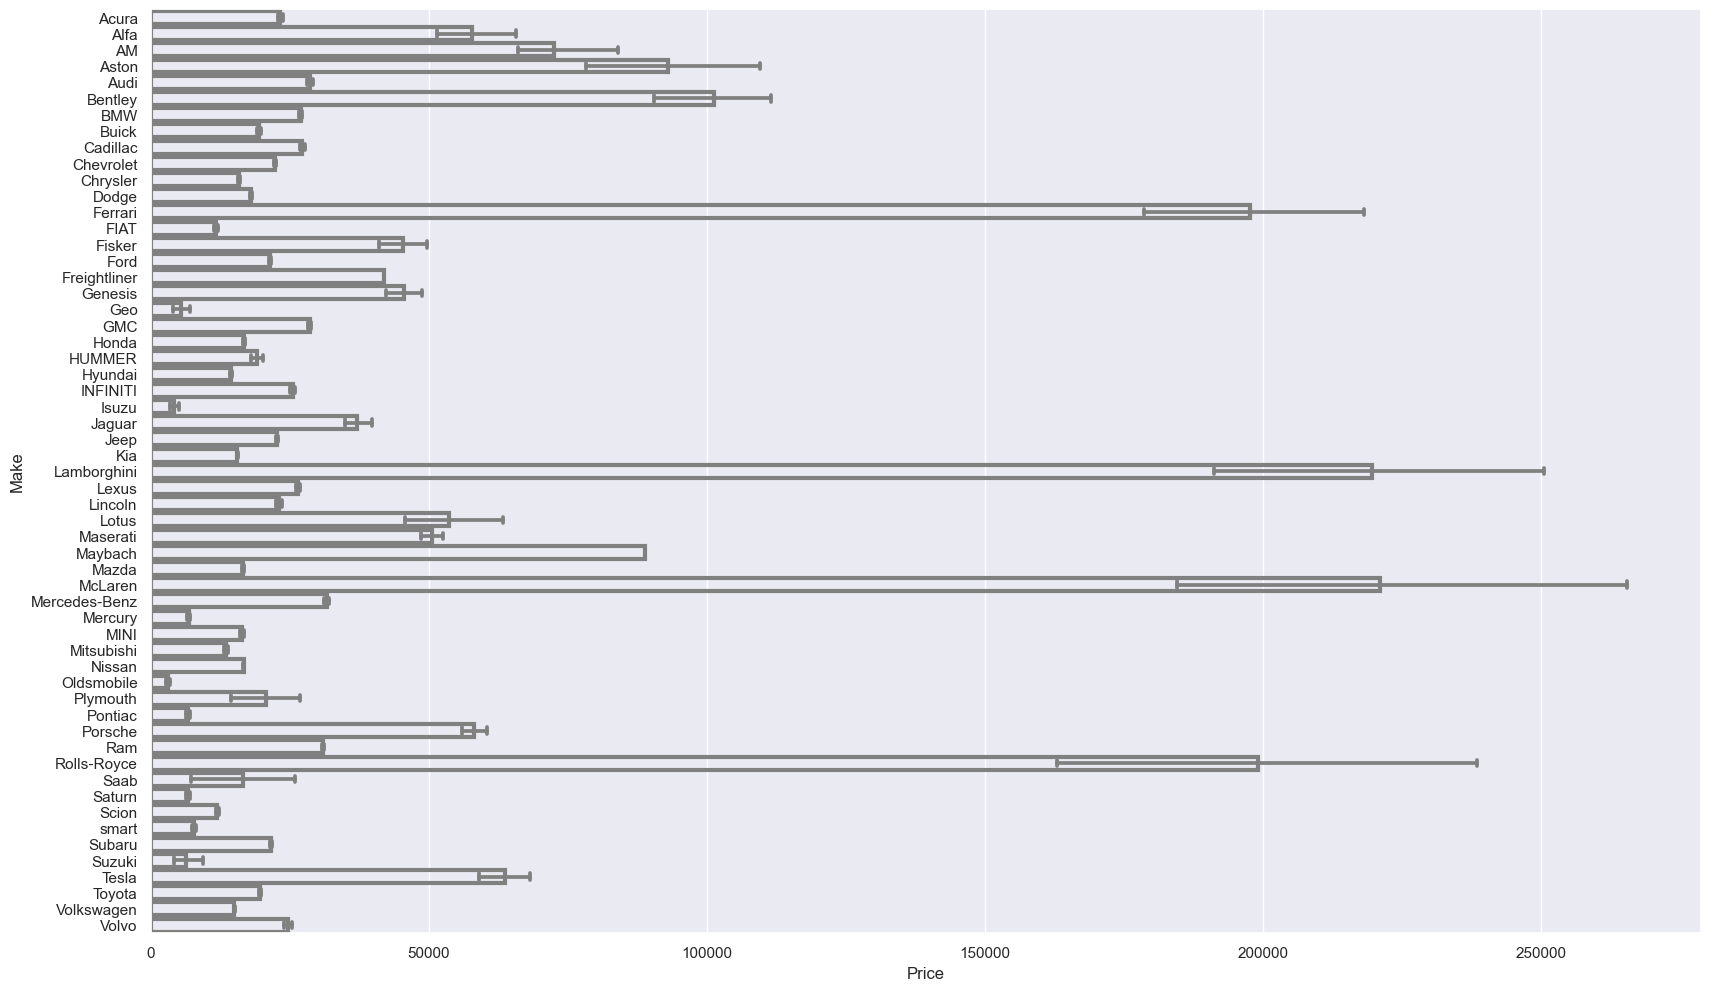

In [18]:
X = df_test.Price
Y = df_test.Make
sns.barplot(
    data=df_test, x=X, y=Y,
    capsize=.4, errcolor=".5",
    linewidth=3, edgecolor=".5", facecolor=(0, 0, 0, 0),
)

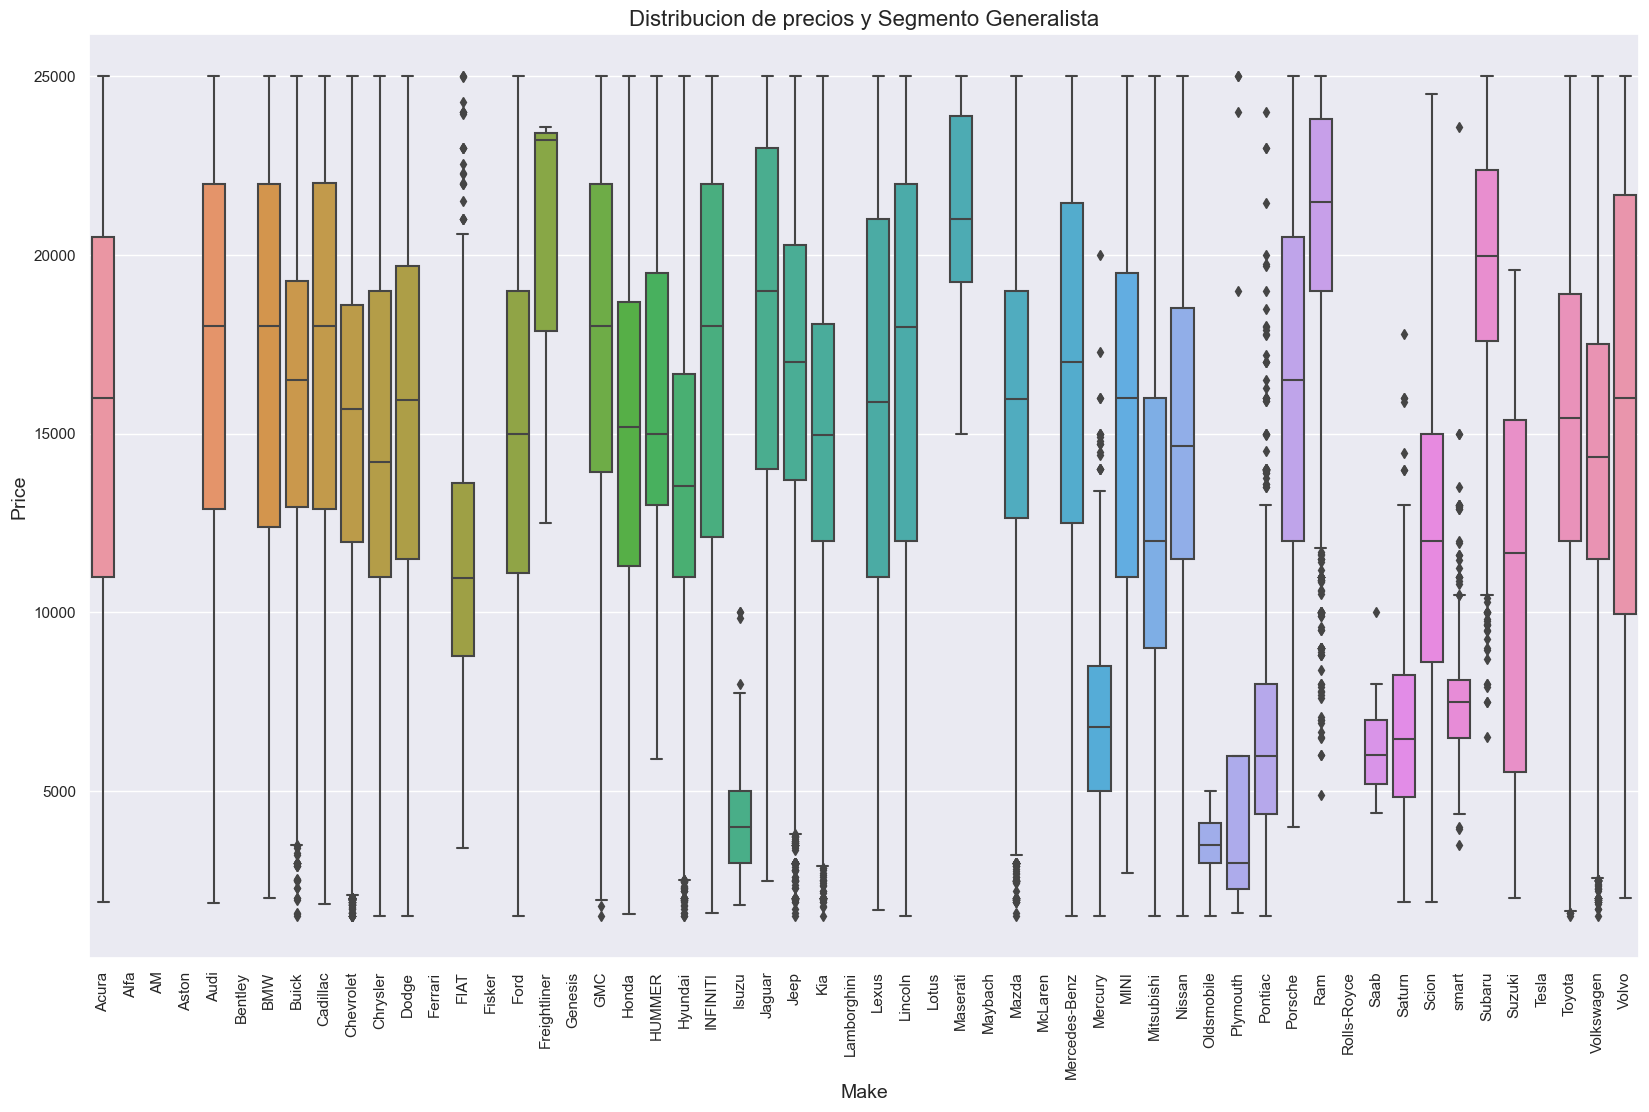

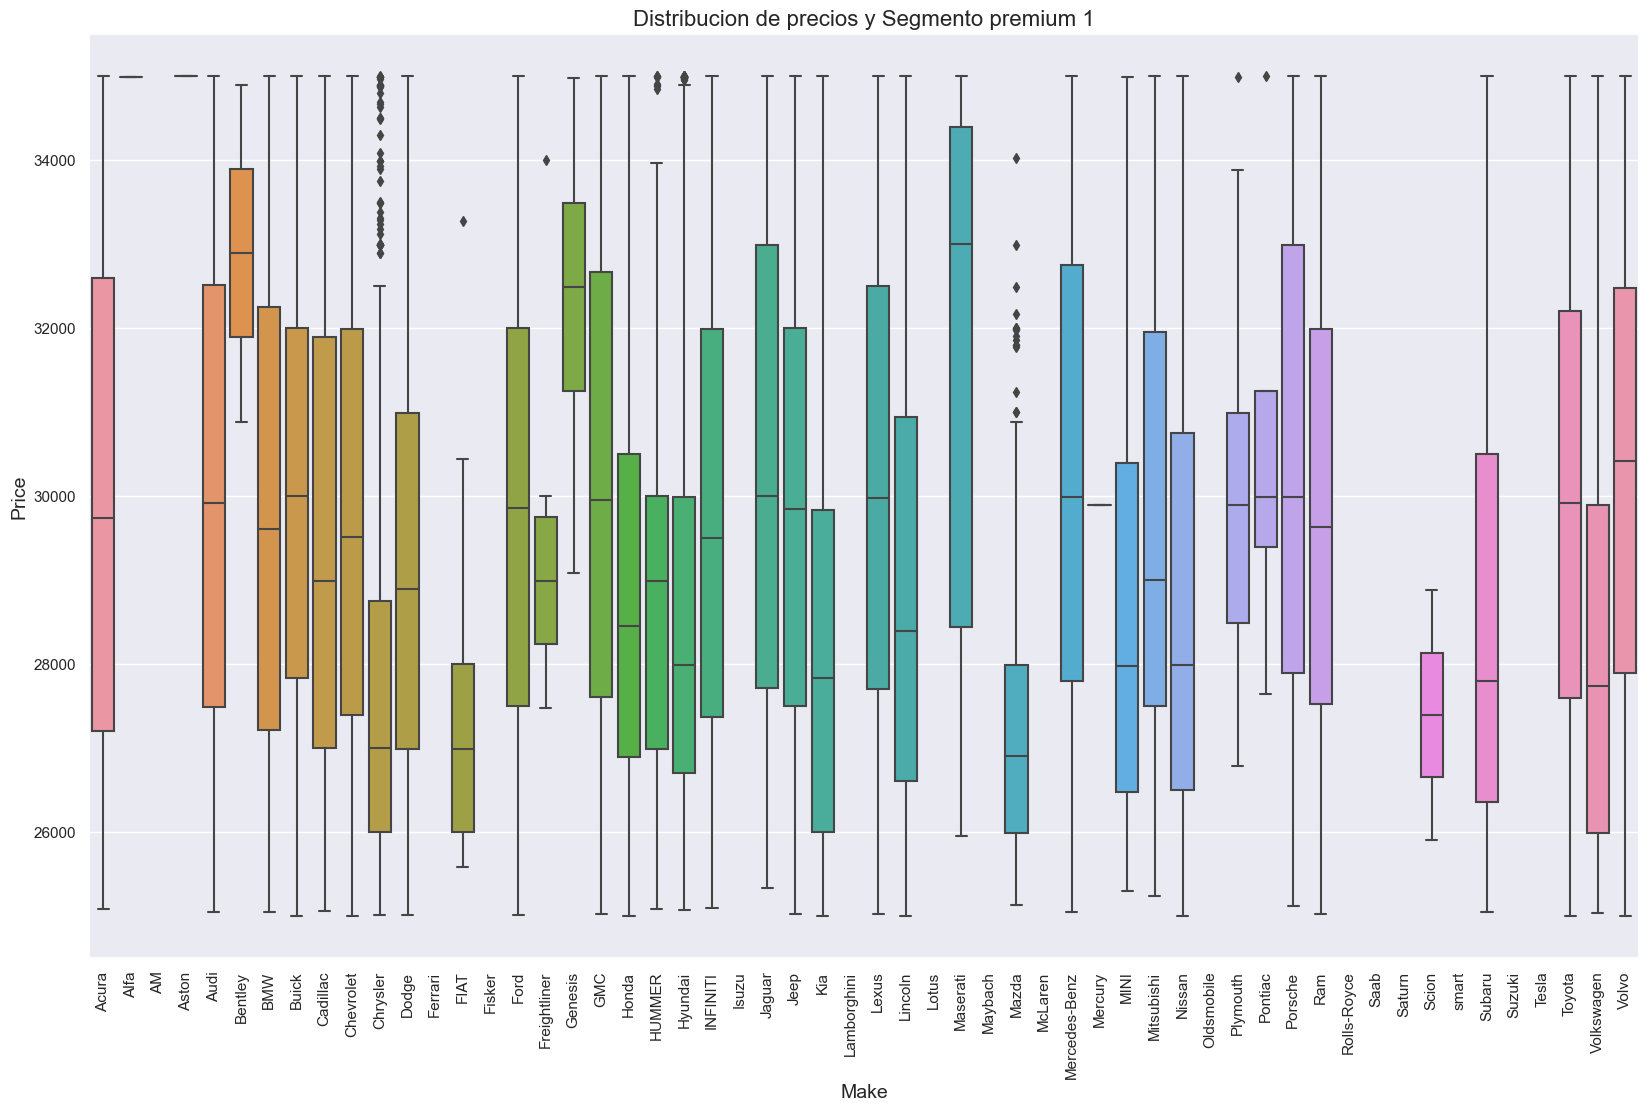

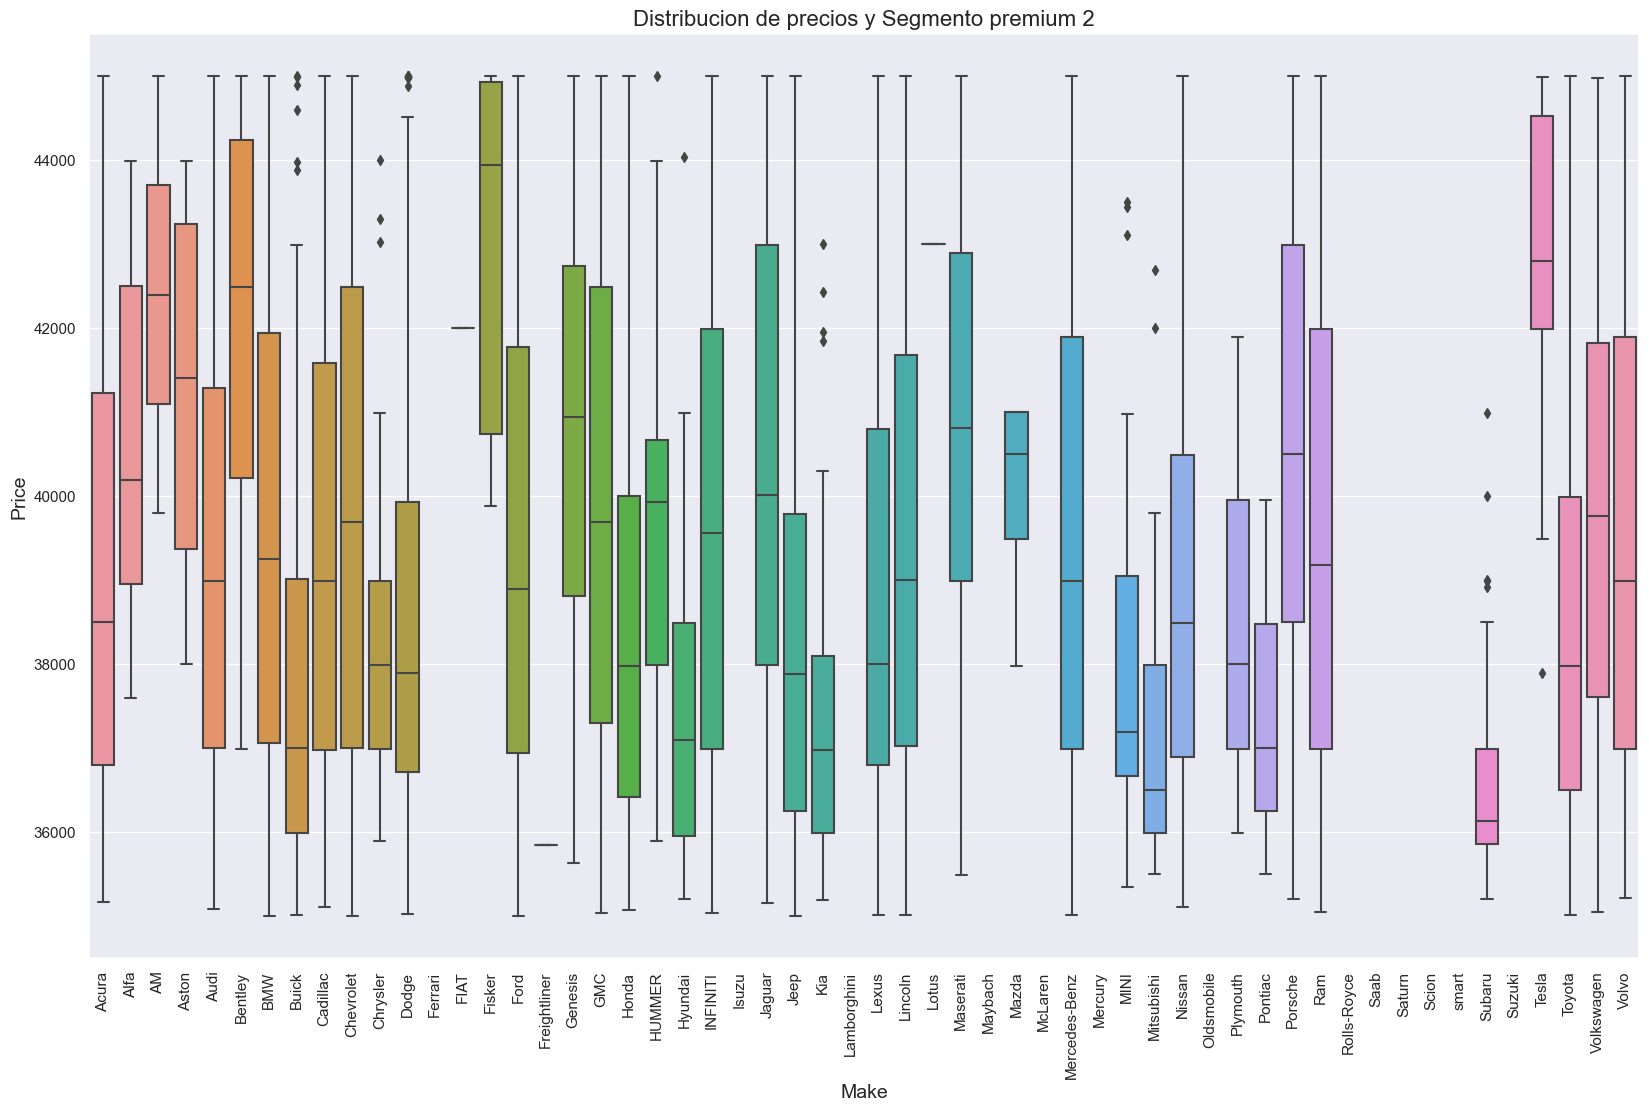

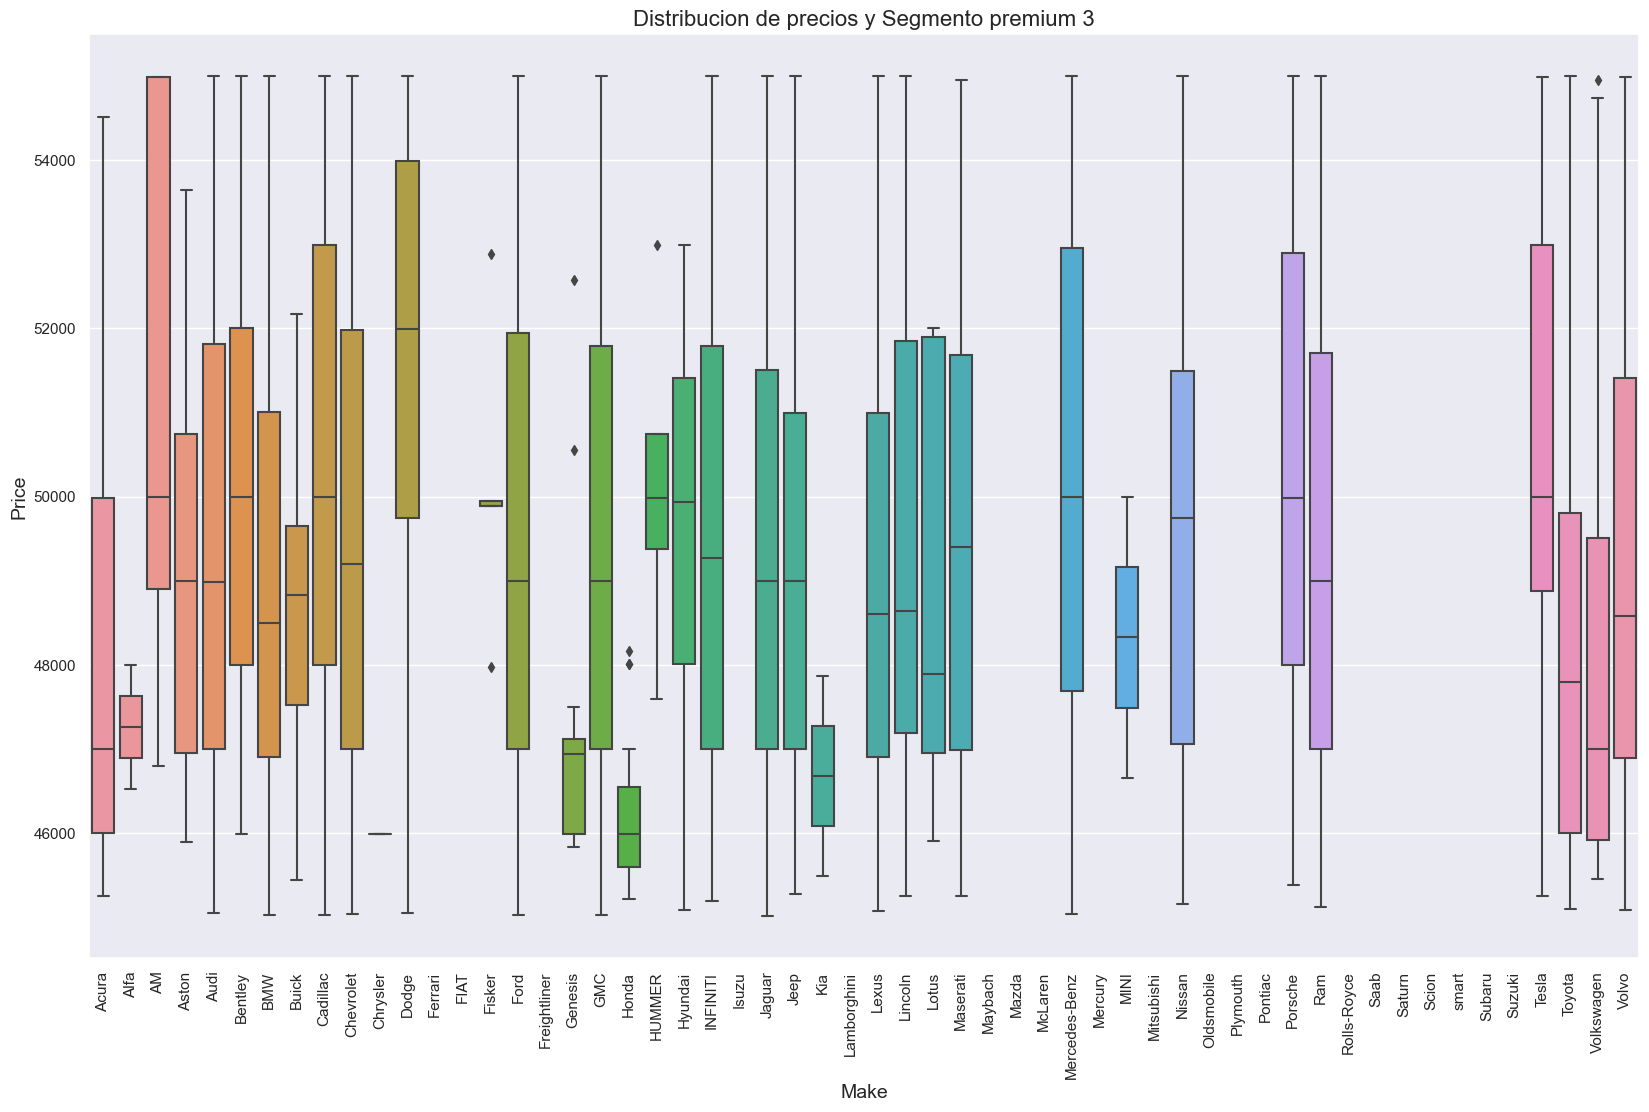

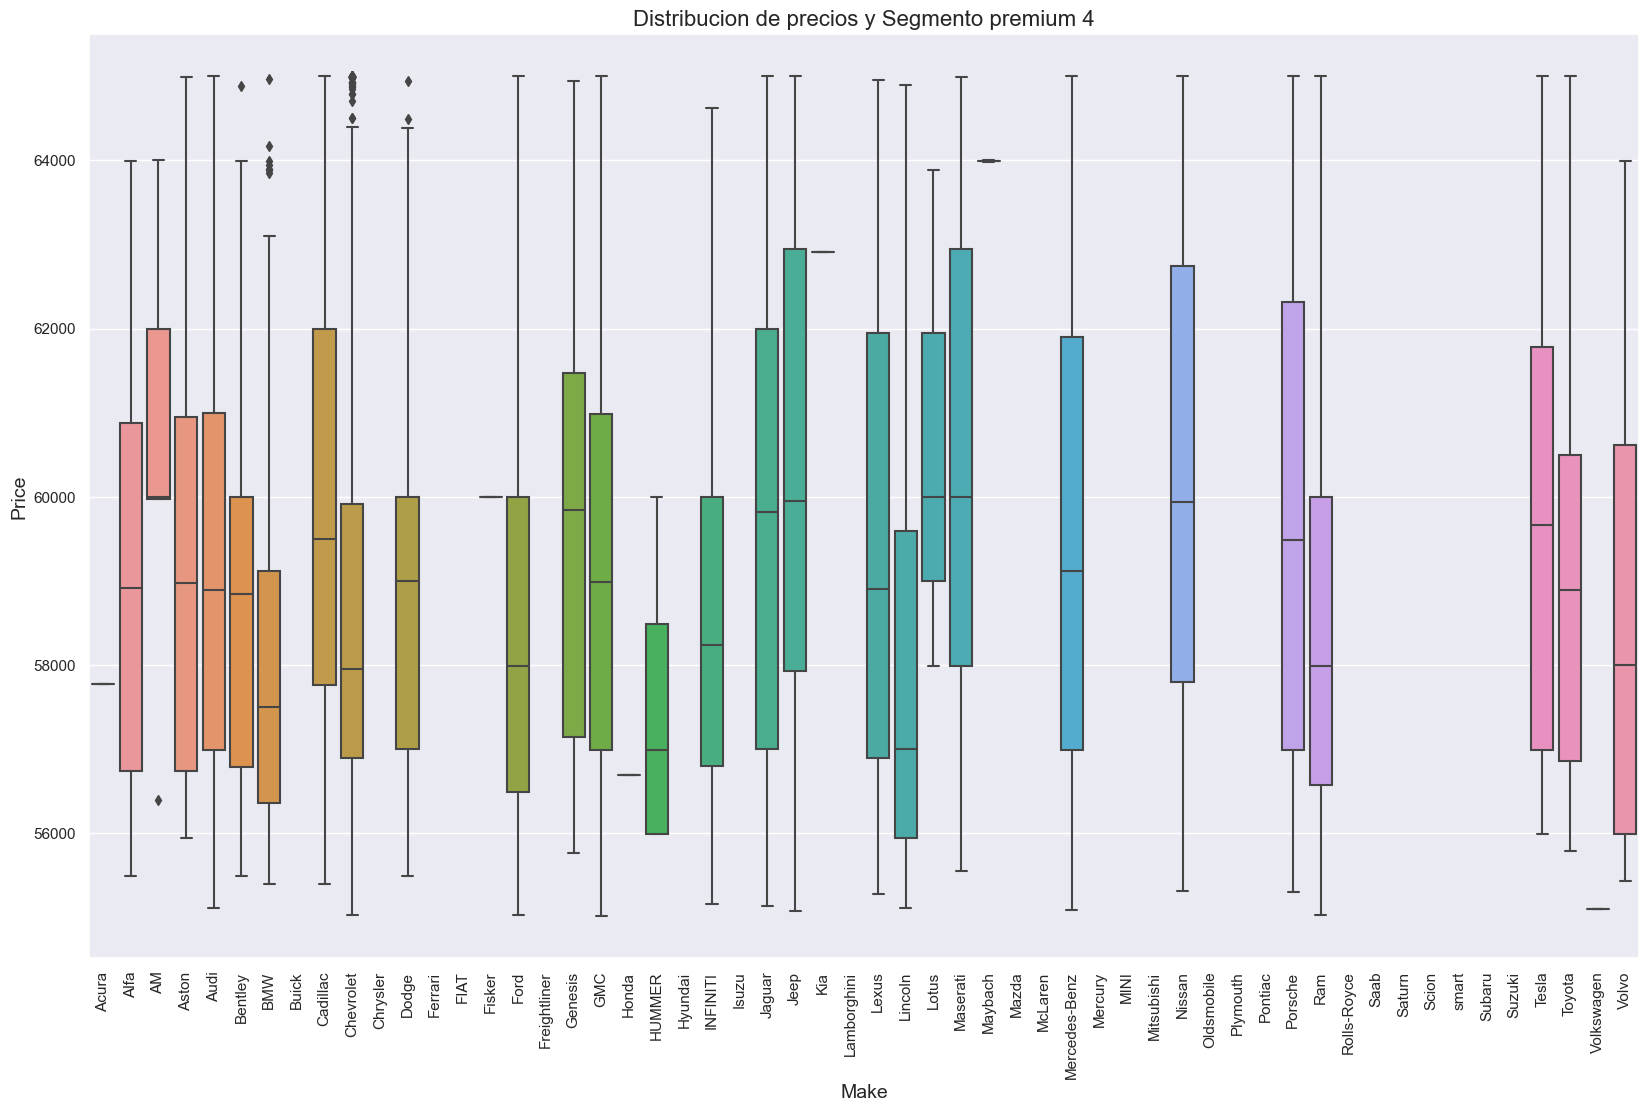

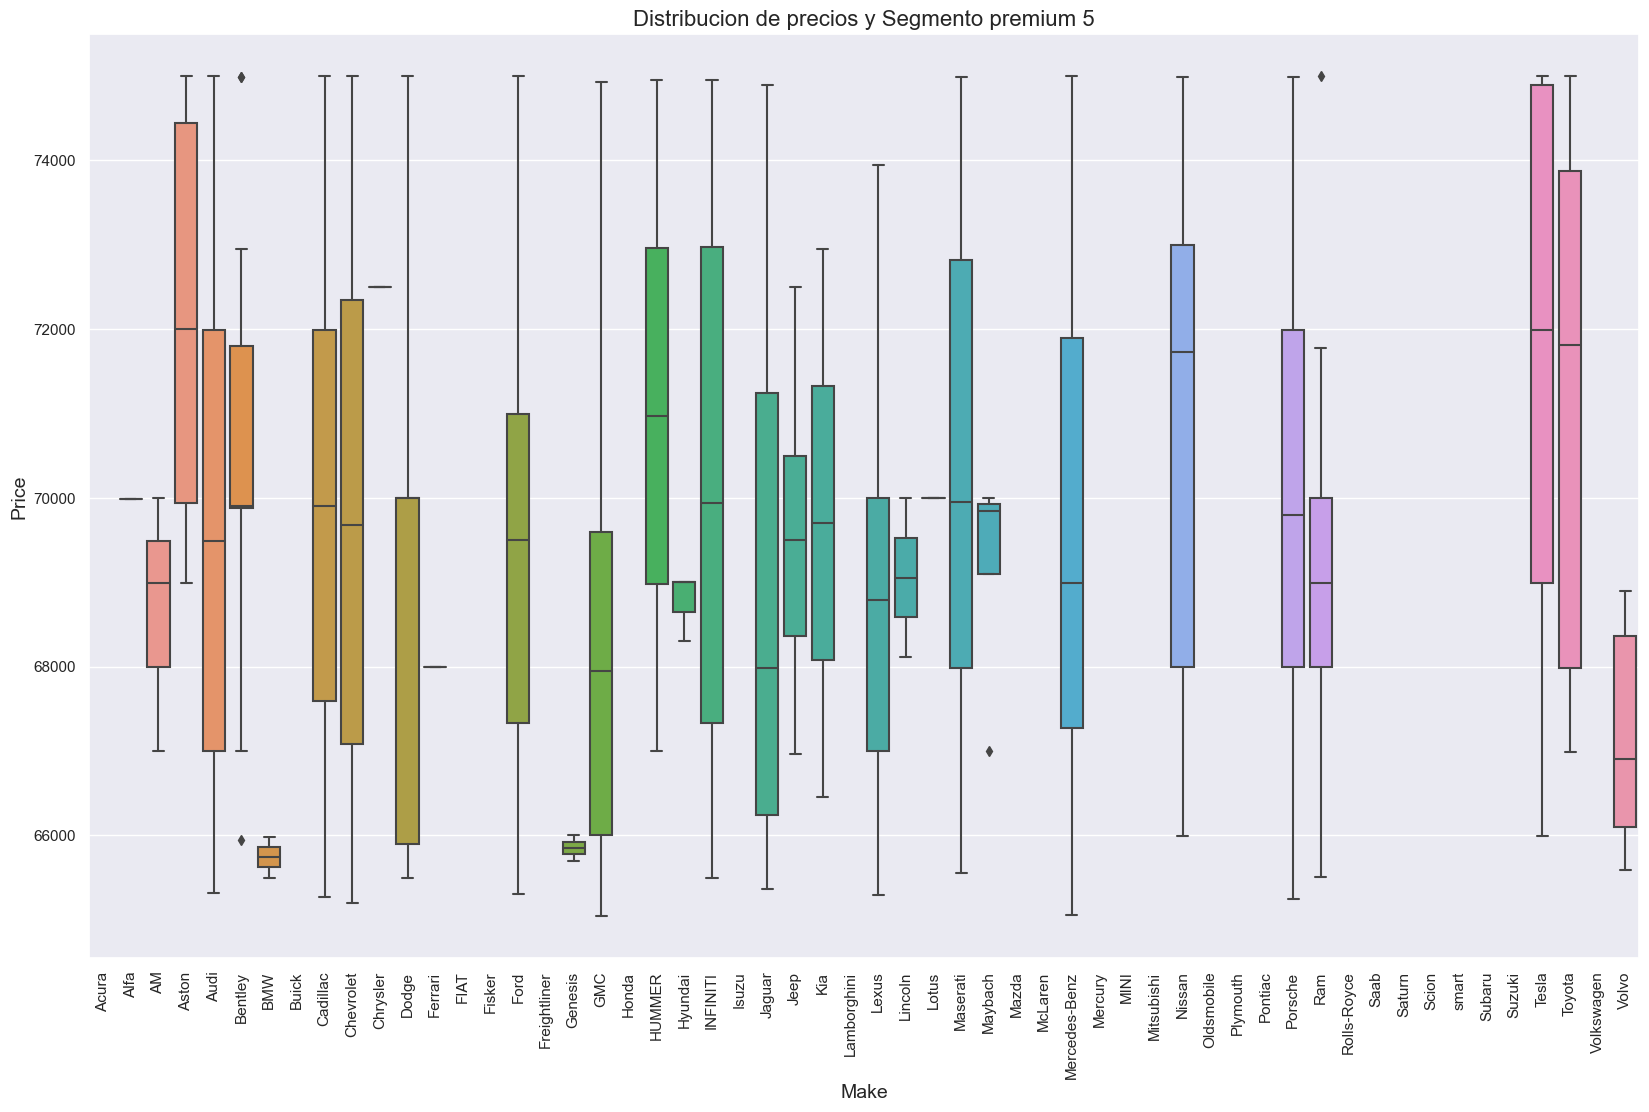

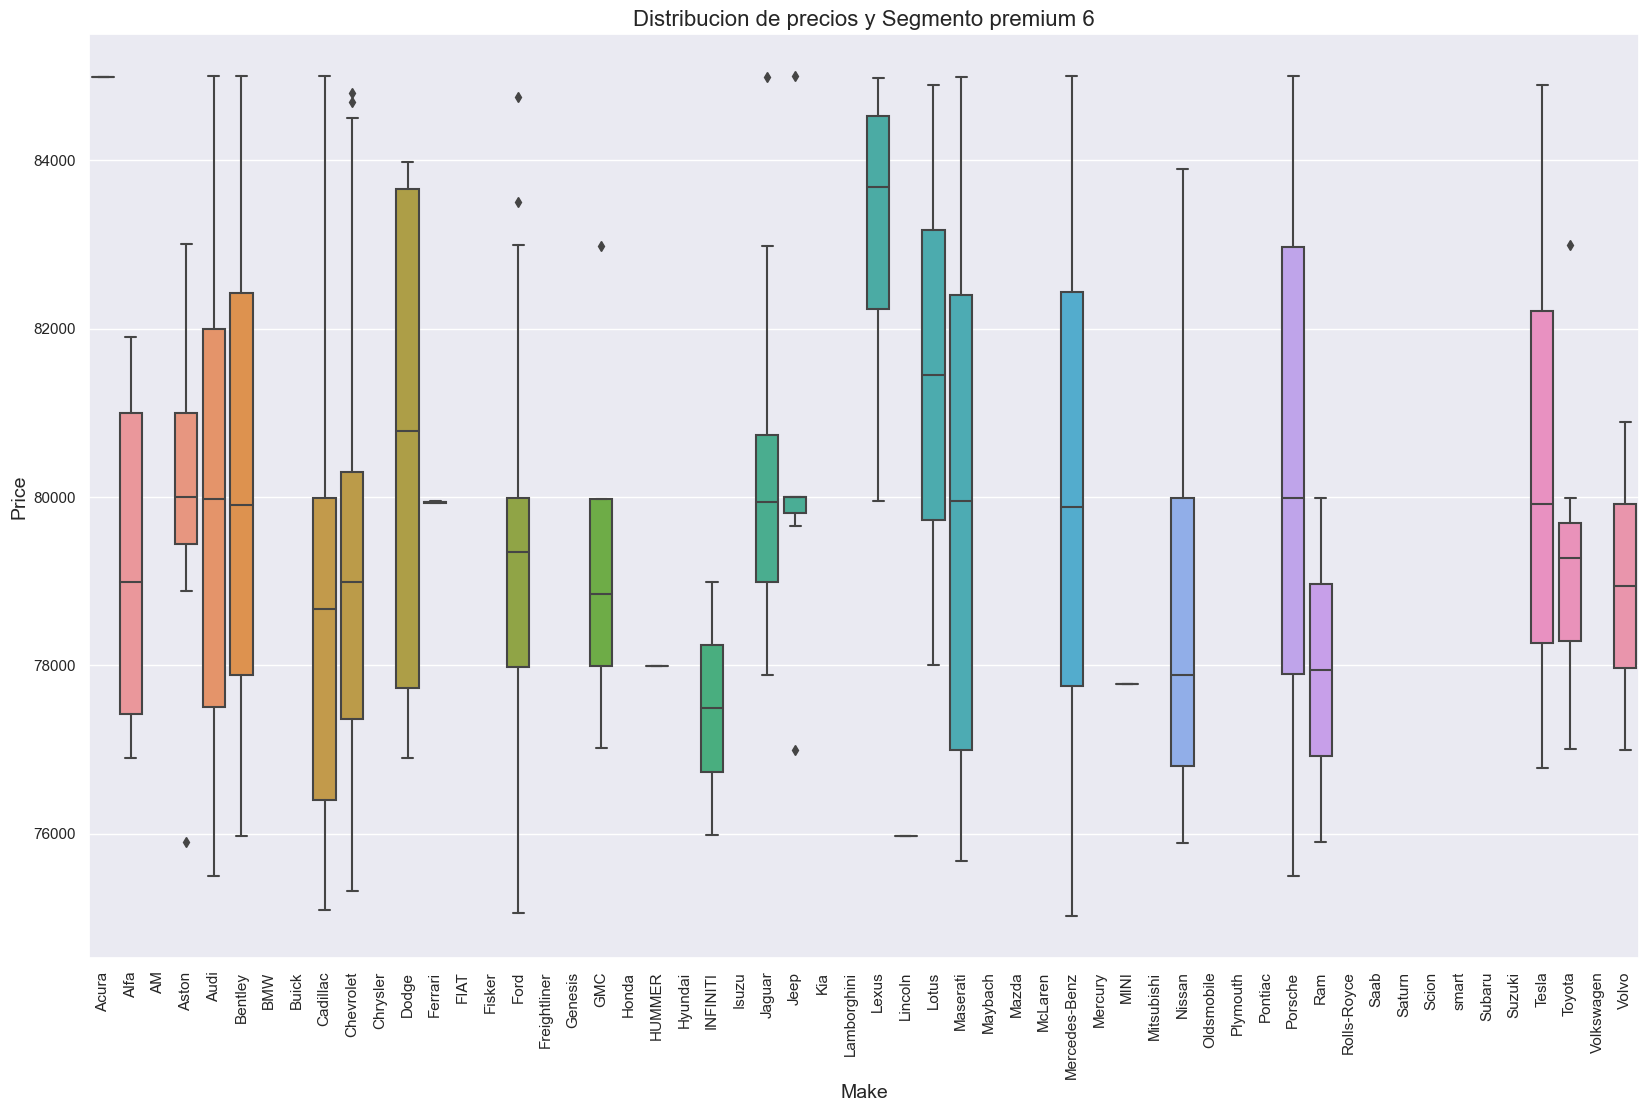

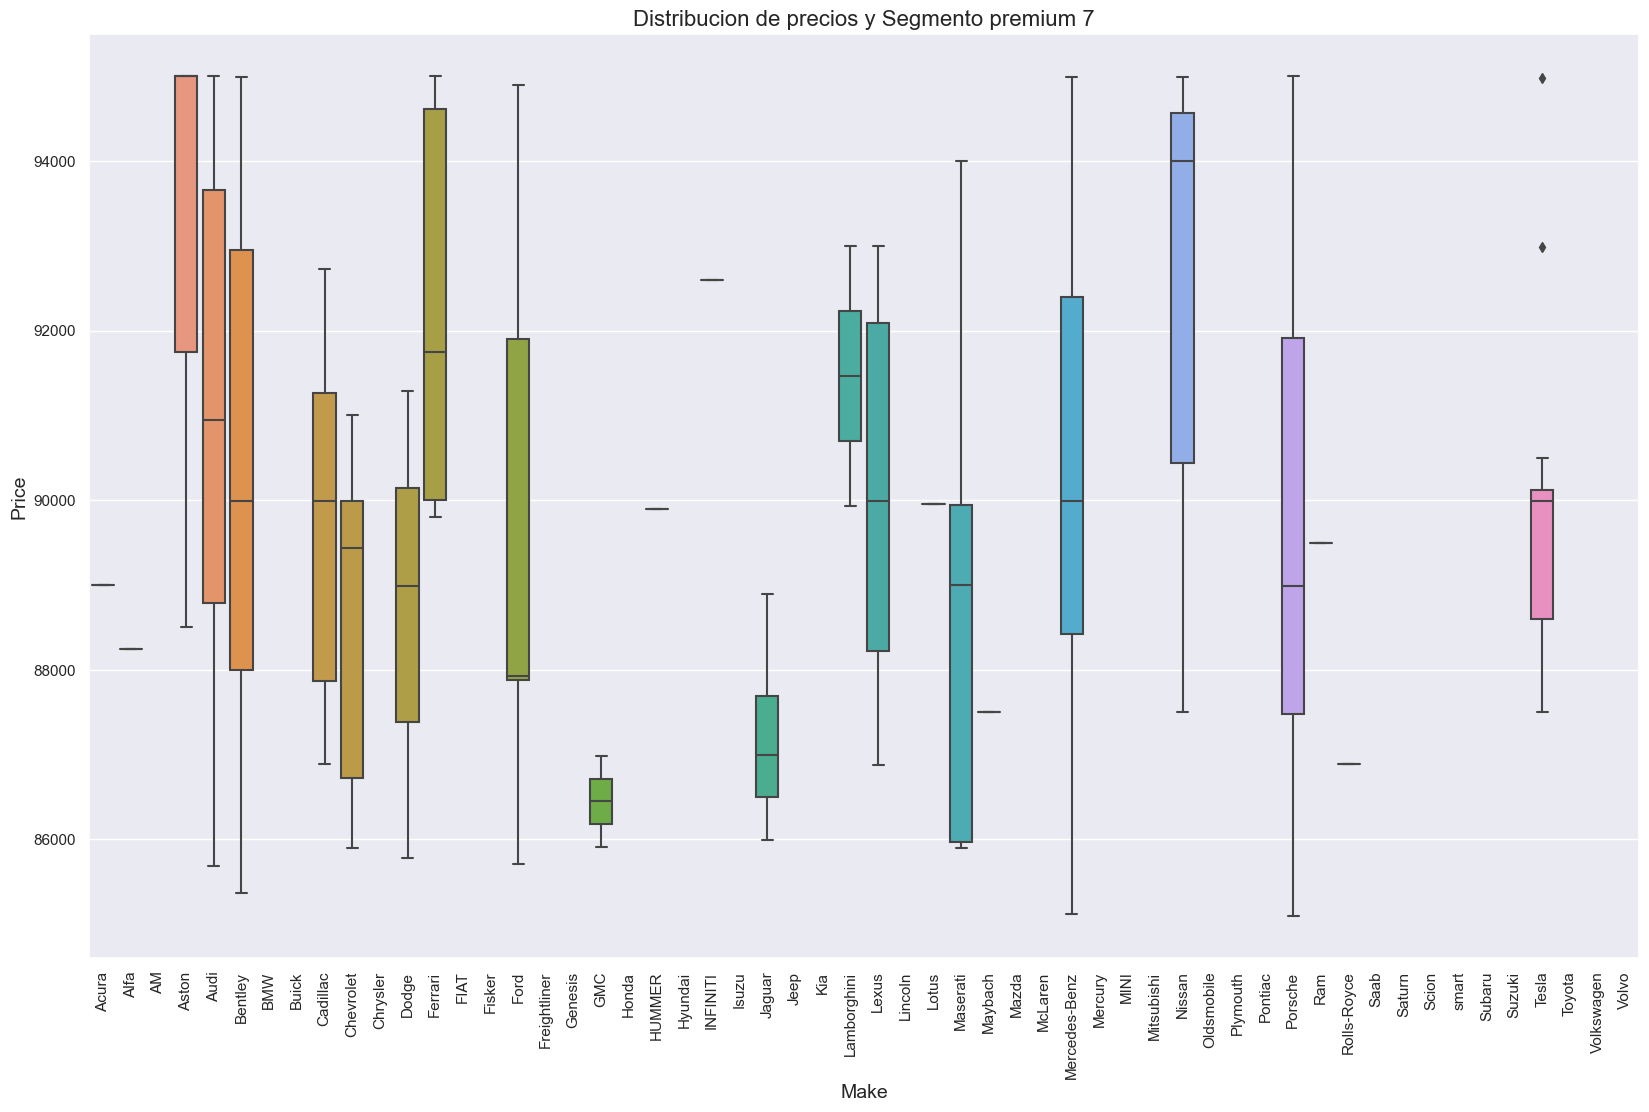

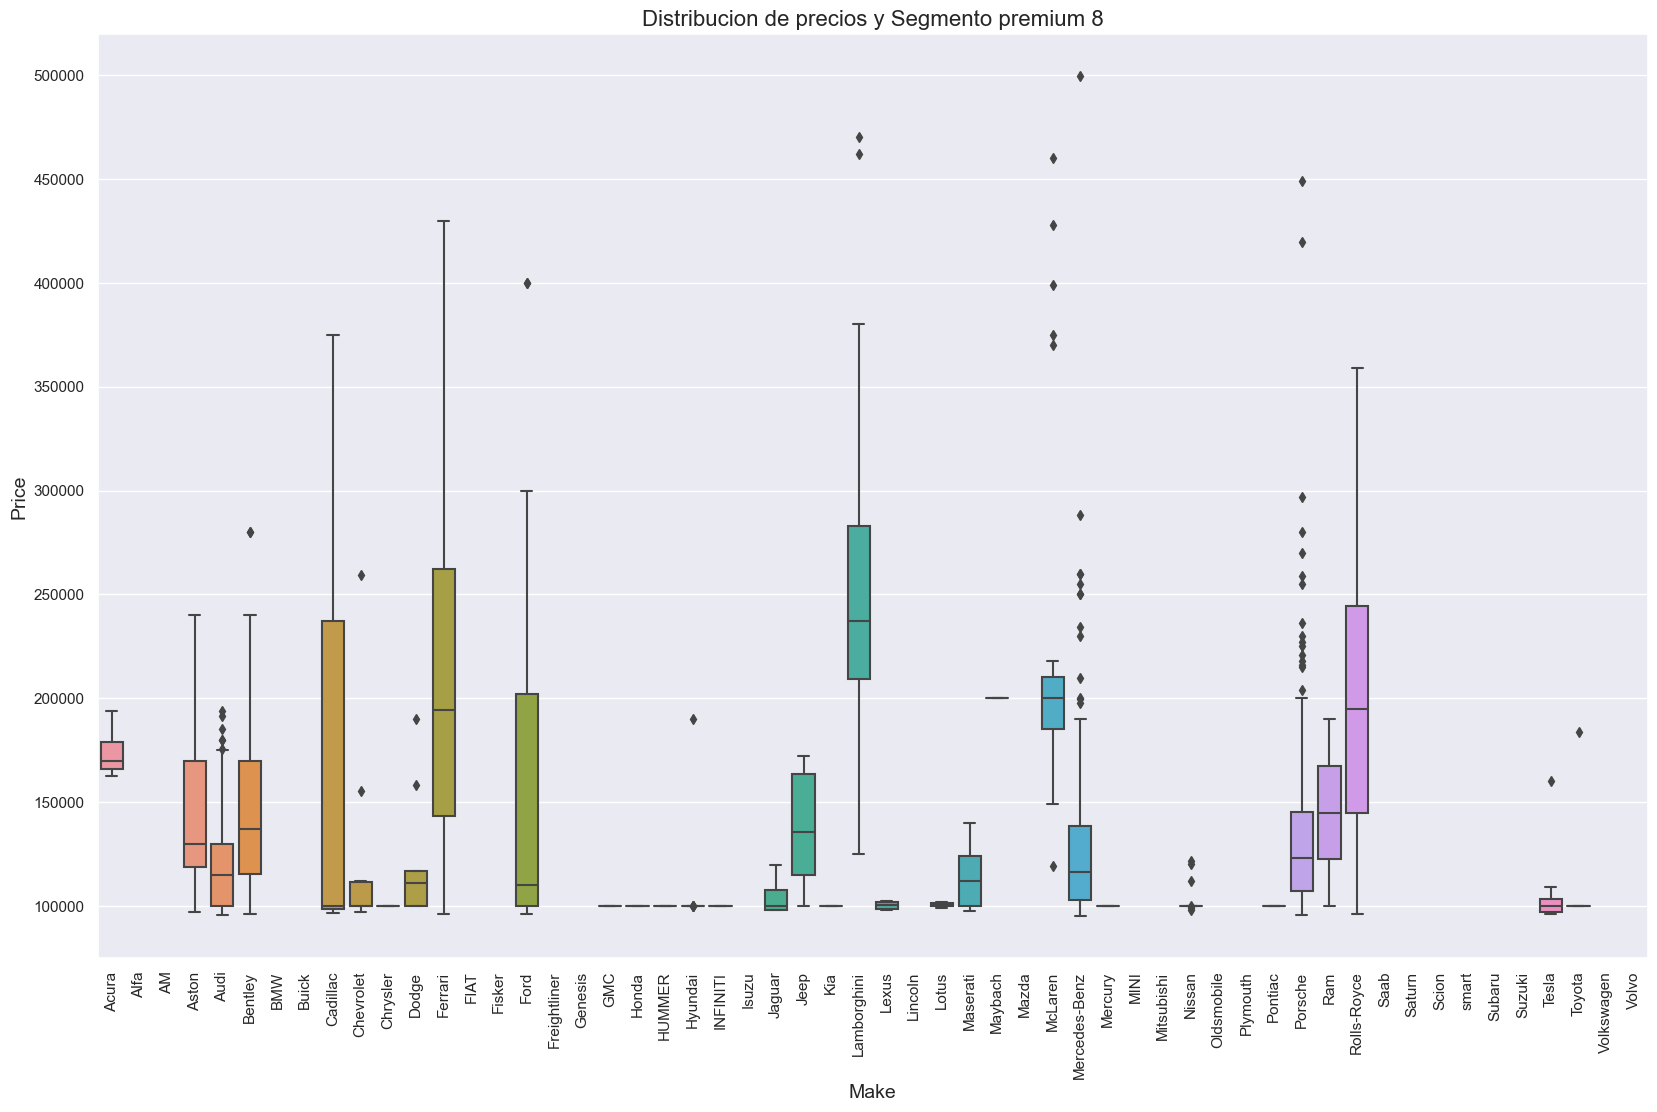

In [19]:
list_bxplot = []
list_bxplot = [df_train_generalista['Price'], df_train_premium1['Price'], df_train_premium2['Price'], df_train_premium3['Price']
               ,df_train_premium4['Price'], df_train_premium5['Price'], df_train_premium6['Price'], df_train_premium7['Price']
               ,df_train_premium8['Price']]

for index, value in enumerate(list_bxplot):
    title = ''
    if index == 0:
        title = 'Distribucion de precios y Segmento Generalista'
    else:
        title = f'Distribucion de precios y Segmento premium {index}'   

    #print(value)
    fx.boxplot_graph(df_train['Make'], value, title)

## Entrenamiento Modelos 

In [20]:
list_dt = []
list_dt = [[df_train_generalista, df_test_generalista], [df_train_premium1, df_test_premium1]
           ,[df_train_premium2, df_test_premium2], [df_train_premium3, df_test_premium3]
           ,[df_train_premium4, df_test_premium4], [df_train_premium5, df_test_premium5]
           ,[df_train_premium6, df_test_premium6], [df_train_premium7, df_test_premium7]
           ,[df_train_premium8, df_test_premium8]]

list_model_result = dict()
df_Predict = pd.DataFrame()

#### LazyPredict => LazyRegressor

#### se aplicara LazyRegressor de la libreria LazyPredict para ayudarnos a comprender que modelos funcionan mejor sin ningun ajuste de parametros.

In [21]:
X_train_model_lazy = df_train_premium8.drop(columns = ['Price'])
y_train_model_lazy = df_train_premium8['Price']

X_test_model_lazy = df_test_premium8.drop(columns = ['Price'])
y_test_model_lazy = df_test_premium8['Price']

reg = LazyRegressor(verbose=0,ignore_warnings=False, custom_metric=None )
models_lazyRegressor, predictions = reg.fit(X_train_model_lazy, X_test_model_lazy, y_train_model_lazy, y_test_model_lazy)

100%|██████████| 42/42 [01:43<00:00,  2.47s/it]


In [22]:
models_lazyRegressor

,Adjusted R-Squared,R-Squared,RMSE,Time Taken
Model,,,,
ExtraTreesRegressor,0.43,0.45,50472.73,0.51
GradientBoostingRegressor,0.42,0.44,51105.71,0.28
RandomForestRegressor,0.41,0.43,51453.67,0.68
AdaBoostRegressor,0.39,0.41,52502.21,0.19
HistGradientBoostingRegressor,0.36,0.38,53507.28,3.05
KNeighborsRegressor,0.34,0.36,54415.90,0.04
LGBMRegressor,0.34,0.36,54511.68,0.14
BaggingRegressor,0.34,0.36,54686.07,0.09
XGBRegressor,0.21,0.23,59605.83,0.28


#### GradientBoostingRegressor

In [23]:
for index, value in enumerate(list_dt):
    title = ''
    key = ''
    if index == 0:
        title = 'Reporte para GradientBoostingRegressor dataset generalista'
        key = f'GradientBoostingRegressor_generalista'
    else:
        title = f'Reporte para GradientBoostingRegressor dataset premium {index}'    
        key = f'GradientBoostingRegressor_premium_{index}'
      
    list_model_result, df_Predict = fx.report_metrics(GradientBoostingRegressor(random_state=11238), value[0], 
                                                    value[1], 'Price', title, key, list_model_result, df_Predict)
    
    print('=============================================================')
    print('\n')

Reporte para GradientBoostingRegressor dataset generalista
    RMSE: 3141.1884314043336
    MAE: 2012.4746159476035
    R2 Score: 0.6373257651194812


Reporte para GradientBoostingRegressor dataset premium 1
    RMSE: 3266.820773261645
    MAE: 2154.356388022057
    R2 Score: -0.33547751741999043


Reporte para GradientBoostingRegressor dataset premium 2
    RMSE: 3256.5599452807714
    MAE: 2062.097533784974
    R2 Score: -0.32099112602515234


Reporte para GradientBoostingRegressor dataset premium 3
    RMSE: 3270.747568006045
    MAE: 2137.516478577294
    R2 Score: -0.32392196087882885


Reporte para GradientBoostingRegressor dataset premium 4
    RMSE: 2808.717115271607
    MAE: 1653.8455754784954
    R2 Score: -0.10879764971321815


Reporte para GradientBoostingRegressor dataset premium 5
    RMSE: 3027.721780177051
    MAE: 2086.2094265211636
    R2 Score: -0.1839769325669014


Reporte para GradientBoostingRegressor dataset premium 6
    RMSE: 3191.0319907688026
    MAE: 2288.48

#### RandomForestRegressor

In [24]:
for index, value in enumerate(list_dt):
    title = ''
    key = ''
    if index == 0:
        title = 'Reporte para RandomForestRegressor dataset generalista'
        key = 'RandomForestRegressor_generalista'
    else:
        title = f'Reporte para RandomForestRegressor dataset premium {index}'    
        key = f'RandomForestRegressor_premium_{index}'
        
    list_model_result, df_Predict = fx.report_metrics(RandomForestRegressor(random_state=11238), value[0], 
                  value[1], 'Price', title, key, list_model_result, df_Predict)
    print('=============================================================')
    print('\n')

Reporte para RandomForestRegressor dataset generalista
    RMSE: 4436.349925557306
    MAE: 2728.8100000000004
    R2 Score: 0.27659698561976864


Reporte para RandomForestRegressor dataset premium 1
    RMSE: 3741.2135252624835
    MAE: 2365.040000000001
    R2 Score: -0.7515032823285557


Reporte para RandomForestRegressor dataset premium 2
    RMSE: 3504.1385741073677
    MAE: 2147.5699999999997
    R2 Score: -0.5294817214254217


Reporte para RandomForestRegressor dataset premium 3
    RMSE: 3812.181058445722
    MAE: 2564.0499999999993
    R2 Score: -0.7985204081548534


Reporte para RandomForestRegressor dataset premium 4
    RMSE: 2859.844912660979
    MAE: 1766.1299999999974
    R2 Score: -0.14953251478081686


Reporte para RandomForestRegressor dataset premium 5
    RMSE: 3271.0743959665015
    MAE: 2094.4100000000035
    R2 Score: -0.3819494406465418


Reporte para RandomForestRegressor dataset premium 6
    RMSE: 3202.853228777021
    MAE: 2022.1800000000003
    R2 Score: -0

#### AdaBoostRegressor

In [25]:
for index, value in enumerate(list_dt):
    title = ''
    key = ''
    if index == 0:
        title = 'Reporte para AdaBoostRegressor dataset generalista'
        key = 'AdaBoostRegressor_generalista'
    else:
        title = f'Reporte para AdaBoostRegressor dataset premium {index}'
        key = f'AdaBoostRegressor_premium_{index}'    
        
    list_model_result, df_Predict = fx.report_metrics(AdaBoostRegressor(random_state=11238), value[0], 
                  value[1], 'Price', title, key, list_model_result, df_Predict)
       
    print('=============================================================')
    print('\n')

Reporte para AdaBoostRegressor dataset generalista
    RMSE: 4011.7542990807974
    MAE: 3026.572256214715
    R2 Score: 0.4084419370008482


Reporte para AdaBoostRegressor dataset premium 1
    RMSE: 2743.7558048286733
    MAE: 2301.857370114609
    R2 Score: 0.05794365967505566


Reporte para AdaBoostRegressor dataset premium 2
    RMSE: 2779.3410936547552
    MAE: 2382.407614213196
    R2 Score: 0.03779979788899834


Reporte para AdaBoostRegressor dataset premium 3
    RMSE: 2822.3700905552537
    MAE: 2386.3644262241287
    R2 Score: 0.0141831110627898


Reporte para AdaBoostRegressor dataset premium 4
    RMSE: 2617.609075208831
    MAE: 1956.5660377358508
    R2 Score: 0.0369565746351288


Reporte para AdaBoostRegressor dataset premium 5
    RMSE: 2774.072265907792
    MAE: 2204.8044943820278
    R2 Score: 0.0060904762981101035


Reporte para AdaBoostRegressor dataset premium 6
    RMSE: 2827.4089813692685
    MAE: 2252.658482142855
    R2 Score: -0.012878880294695305


Reporte p

#### BaggingRegressor

In [26]:
for index, value in enumerate(list_dt):
    title = ''
    key = ''
    if index == 0:
        title = 'Reporte para BaggingRegressor dataset generalista'
        key = 'BaggingRegressor_generalista' 
    else:
        title = f'Reporte para BaggingRegressor dataset premium {index}'    
        key = f'BaggingRegressor_premium_{index}'    
        
    list_model_result, df_Predict = fx.report_metrics(BaggingRegressor(random_state=11238), value[0], 
                  value[1], 'Price', title, key, list_model_result, df_Predict)
       
    print('=============================================================')
    print('\n')

Reporte para BaggingRegressor dataset generalista
    RMSE: 4418.848187467434
    MAE: 2648.7999999999993
    R2 Score: 0.28229348674048726


Reporte para BaggingRegressor dataset premium 1
    RMSE: 3864.554311822151
    MAE: 2499.2999999999993
    R2 Score: -0.8688945364459593


Reporte para BaggingRegressor dataset premium 2
    RMSE: 3559.847465628533
    MAE: 2164.0999999999985
    R2 Score: -0.5784997787979758


Reporte para BaggingRegressor dataset premium 3
    RMSE: 3988.961772424441
    MAE: 2628.4000000000015
    R2 Score: -0.9691920808786201


Reporte para BaggingRegressor dataset premium 4
    RMSE: 3055.3179025247855
    MAE: 1830.9000000000015
    R2 Score: -0.31204613098488254


Reporte para BaggingRegressor dataset premium 5
    RMSE: 3372.6948515629283
    MAE: 2248.5
    R2 Score: -0.46914753399112086


Reporte para BaggingRegressor dataset premium 6
    RMSE: 3268.7231307424086
    MAE: 1918.8499999999985
    R2 Score: -0.3537439283867796


Reporte para BaggingRegre

#### ElasticNet

In [27]:

for index, value in enumerate(list_dt):
    title = ''
    key = ''
    if index == 0:
        title = 'Reporte para DecisionTreeRegressor dataset generalista'
        key = 'DecisionTreeRegressor_generalista'
    else:
        title = f'Reporte para DecisionTreeRegressor dataset premium {index}'    
        key = f'DecisionTreeRegressor_premium_{index}'  
        
    list_model_result, df_Predict = fx.report_metrics(ElasticNet(random_state=11238), value[0], 
                  value[1], 'Price', title, key, list_model_result, df_Predict)
    
    print('=============================================================')
    print('\n')

Reporte para DecisionTreeRegressor dataset generalista
    RMSE: 3452.002862102804
    MAE: 2286.881876403
    R2 Score: 0.5620031177804417


Reporte para DecisionTreeRegressor dataset premium 1
    RMSE: 2748.240050420959
    MAE: 2189.2038788393256
    R2 Score: 0.05486185184128023


Reporte para DecisionTreeRegressor dataset premium 2
    RMSE: 2799.1804112286404
    MAE: 2388.555337996615
    R2 Score: 0.024014137119924506


Reporte para DecisionTreeRegressor dataset premium 3
    RMSE: 2832.700545433705
    MAE: 2397.4417331087097
    R2 Score: 0.006953318927972685


Reporte para DecisionTreeRegressor dataset premium 4
    RMSE: 2625.268916052295
    MAE: 1956.7263342396182
    R2 Score: 0.031312070539833314


Reporte para DecisionTreeRegressor dataset premium 5
    RMSE: 3001.3960019938977
    MAE: 2366.984208807058
    R2 Score: -0.16347728961256847


Reporte para DecisionTreeRegressor dataset premium 6
    RMSE: 2840.9833880895376
    MAE: 2281.654736132972
    R2 Score: -0.022

#### DecisionTreeRegressor

In [28]:

#max = 1000

for index, value in enumerate(list_dt):
    title = ''
    key = ''
    if index == 0:
        title = 'Reporte para DecisionTreeRegressor dataset generalista'
        key = 'DecisionTreeRegressor_generalista'
    else:
        title = f'Reporte para DecisionTreeRegressor dataset premium {index}'    
        key = f'DecisionTreeRegressor_premium_{index}'    
        
    list_model_result, df_Predict = fx.report_metrics(DecisionTreeRegressor(random_state=11238), value[0], 
                  value[1], 'Price', title, key, list_model_result, df_Predict)

    print('=============================================================')
    print('\n')

Reporte para DecisionTreeRegressor dataset generalista
    RMSE: 5430.0844127789505
    MAE: 3505.0
    R2 Score: -0.08378188252855523


Reporte para DecisionTreeRegressor dataset premium 1
    RMSE: 4488.44535494046
    MAE: 3301.0
    R2 Score: -1.5210290401625612


Reporte para DecisionTreeRegressor dataset premium 2
    RMSE: 4291.291964116746
    MAE: 2990.0
    R2 Score: -1.29381227870849


Reporte para DecisionTreeRegressor dataset premium 3
    RMSE: 4467.712663437837
    MAE: 3089.5
    R2 Score: -1.470238010818778


Reporte para DecisionTreeRegressor dataset premium 4
    RMSE: 4034.9552987458787
    MAE: 2509.0
    R2 Score: -1.2883041637161803


Reporte para DecisionTreeRegressor dataset premium 5
    RMSE: 4139.778607800919
    MAE: 2893.0
    R2 Score: -1.2134287320938277


Reporte para DecisionTreeRegressor dataset premium 6
    RMSE: 4296.721952900902
    MAE: 3322.5
    R2 Score: -1.3391321105718945


Reporte para DecisionTreeRegressor dataset premium 7
    RMSE: 4620.

#### LinearRegression

In [29]:
for index, value in enumerate(list_dt):
    title = ''
    key = ''
    if index == 0:
        title = 'Reporte para LinearRegression dataset generalista'
        key = 'LinearRegression_generalista'
    else:
        title = f'Reporte para LinearRegression dataset premium {index}'    
        key = f'LinearRegression_premium_{index}' 
        
    list_model_result, df_Predict = fx.report_metrics(LinearRegression(), value[0], 
                  value[1], 'Price', title, key, list_model_result, df_Predict)
            
    print('=============================================================')
    print('\n')

Reporte para LinearRegression dataset generalista
    RMSE: 3448.757785407445
    MAE: 2278.447394916322
    R2 Score: 0.5628262140901543


Reporte para LinearRegression dataset premium 1
    RMSE: 2756.106449258367
    MAE: 2165.2491371048964
    R2 Score: 0.04944349390600422


Reporte para LinearRegression dataset premium 2
    RMSE: 2793.387091094071
    MAE: 2366.8379702482634
    R2 Score: 0.028049852306730627


Reporte para LinearRegression dataset premium 3
    RMSE: 2829.97659976888
    MAE: 2392.0743151800707
    R2 Score: 0.008862242643747131


Reporte para LinearRegression dataset premium 4
    RMSE: 2623.361253588978
    MAE: 1920.606749858911
    R2 Score: 0.03271936118924379


Reporte para LinearRegression dataset premium 5
    RMSE: 3036.0964808707968
    MAE: 2391.491640297405
    R2 Score: -0.190535768725963


Reporte para LinearRegression dataset premium 6
    RMSE: 2863.168100418627
    MAE: 2191.4255085107143
    R2 Score: -0.038661282007617315


Reporte para Linear

#### LassoCV

In [30]:

for index, value in enumerate(list_dt):
    title = ''
    key = ''
    if index == 0:
        title = 'Reporte para LassoCV dataset generalista'
        key = 'LassoCV_generalista'
    else:
        title = f'Reporte para LassoCV dataset premium {index}'
        key = f'LassoCV_premium_{index}'
        
    list_model_result, df_Predict = fx.report_metrics(LassoCV(cv=3, random_state=11238), value[0], 
                  value[1], 'Price', title, key, list_model_result, df_Predict)

    print('=============================================================')
    print('\n')

Reporte para LassoCV dataset generalista
    RMSE: 3870.0422998785434
    MAE: 2575.8492727487446
    R2 Score: 0.44949641862029865


Reporte para LassoCV dataset premium 1
    RMSE: 2756.3468958113303
    MAE: 2269.385124545388
    R2 Score: 0.0492776309327444


Reporte para LassoCV dataset premium 2
    RMSE: 2817.6280277769265
    MAE: 2447.4489296098545
    R2 Score: 0.011107543922172058


Reporte para LassoCV dataset premium 3
    RMSE: 2842.6014400961008
    MAE: 2441.7016836310067
    R2 Score: -6.340131804005722e-07


Reporte para LassoCV dataset premium 4
    RMSE: 2673.2523658470914
    MAE: 1954.3775579185167
    R2 Score: -0.004421996426354324


Reporte para LassoCV dataset premium 5
    RMSE: 2772.7403219803527
    MAE: 2191.8952263134997
    R2 Score: 0.0070446792280676185


Reporte para LassoCV dataset premium 6
    RMSE: 2841.149125471068
    MAE: 2315.7309811608648
    R2 Score: -0.022747221100465786


Reporte para LassoCV dataset premium 7
    RMSE: 2653.8916641892065

## Serializacion Modelo

In [31]:
list_model_result

{'GradientBoostingRegressor_generalista': GradientBoostingRegressor(random_state=11238),
 'GradientBoostingRegressor_premium_1': GradientBoostingRegressor(random_state=11238),
 'GradientBoostingRegressor_premium_2': GradientBoostingRegressor(random_state=11238),
 'GradientBoostingRegressor_premium_3': GradientBoostingRegressor(random_state=11238),
 'GradientBoostingRegressor_premium_4': GradientBoostingRegressor(random_state=11238),
 'GradientBoostingRegressor_premium_5': GradientBoostingRegressor(random_state=11238),
 'GradientBoostingRegressor_premium_6': GradientBoostingRegressor(random_state=11238),
 'GradientBoostingRegressor_premium_7': GradientBoostingRegressor(random_state=11238),
 'GradientBoostingRegressor_premium_8': GradientBoostingRegressor(random_state=11238),
 'RandomForestRegressor_generalista': RandomForestRegressor(random_state=11238),
 'RandomForestRegressor_premium_1': RandomForestRegressor(random_state=11238),
 'RandomForestRegressor_premium_2': RandomForestRegress

In [32]:
res = {k: v for k, v in list_model_result.items() if k.startswith('GradientBoostingRegressor')}
for index, x in enumerate(res.values()):
    modelo = ''
    if index == 0:
        modelo = f'GradientBoostingRegressor_generalista'
    else:  
        modelo = f'GradientBoostingRegressor_premium_{index}'
        
    pickle.dump(x, open(f'{modelo}.sav', 'wb'))

In [33]:
list_filter = ['generalista', 'premium_1', 'premium_2', 'premium_3', 'premium_4', 
               'premium_5', 'premium_6', 'premium_7', 'premium_8']

In [34]:
df_Predict.head(100)

,Modelo,RMSE,MAE,R2 Score,Cantidad Filas
0,GradientBoostingRegressor_generalista,3141.19,2012.47,0.64,437973
1,GradientBoostingRegressor_premium_1,3266.82,2154.36,-0.34,113138
2,GradientBoostingRegressor_premium_2,3256.56,2062.10,-0.32,42299
3,GradientBoostingRegressor_premium_3,3270.75,2137.52,-0.32,15621
4,GradientBoostingRegressor_premium_4,2808.72,1653.85,-0.11,5005
...,...,...,...,...,...
67,LassoCV_premium_4,2673.25,1954.38,-0.00,5005
68,LassoCV_premium_5,2772.74,2191.90,0.01,1617
69,LassoCV_premium_6,2841.15,2315.73,-0.02,676
70,LassoCV_premium_7,2653.89,1721.57,0.00,381


In [35]:
df_filter_values = pd.DataFrame()

for index, value in enumerate(list_filter):
   df_predict_filter = df_Predict[df_Predict['Modelo'].str.contains(value)]
   
   df_predict_filter_min = df_predict_filter['MAE'].min()
   df_modelo = df_predict_filter[df_predict_filter['MAE'] ==  df_predict_filter_min]
   
   #print(df_modelo['Modelo'].values)
   #print(df_modelo['Cantidad Filas'].values)
   
   d = {'Modelo': df_modelo['Modelo'].values[0], 
        'Min MAE': df_predict_filter_min,
        'Filas': df_modelo['Cantidad Filas'].values[0]}
   
   df_filter_values = df_filter_values.append(d, ignore_index=True)
          

En la sgte tabla se observa que la mayoria de los MAE(menores) corresponden a modelos GradientBoostingRegressor

In [36]:
df_filter_values

,Modelo,Min MAE,Filas
0,GradientBoostingRegressor_generalista,2012.47,437973
1,GradientBoostingRegressor_premium_1,2154.36,113138
2,GradientBoostingRegressor_premium_2,2062.10,42299
3,GradientBoostingRegressor_premium_3,2137.52,15621
4,GradientBoostingRegressor_premium_4,1653.85,5005
5,GradientBoostingRegressor_premium_5,2086.21,1617
6,BaggingRegressor_premium_6,1918.85,676
7,AdaBoostRegressor_premium_7,1714.01,381
8,GradientBoostingRegressor_premium_8,16119.72,1546
